In [832]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

<font size = 6> Solución de sistemas por matriz inversa

In [833]:
def Sol_Minv(A,B):
    a = np.linalg.inv(A)
    sol = np.dot(a,B)
    return sol

<font size = 6> Aproximación bilineal y función para obtener los coeficientes del sistema

In [834]:
def T2(x,y,p): #Recibe los valores individualmente
    n = len(p)
    expr=0.
    for i in range(0,n):
        for j in range(0,n):
            expr+=(x**i)*(y**j)*p[i,j]
    return expr

def T(a,p): #Recibe los valores en una tupla o array de entradas
    x,y=a
    n = len(p)
    expr=0.
    for i in range(0,n):
        for j in range(0,n):
            expr+=(x**i)*(y**j)*p[i,j]
    return expr

def coeficientes(x,y,p): #Retorna los coeficientes para las 4 entradas de la aproximación
    n = len(p)
    expr=0.
    lista = []
    for i in range(0,n):
        for j in range(0,n):
            add = (x**i)*(y**j)
            expr+=add*p[i,j]
            lista.append(add)
    return lista

<font size = 6> Se utiliza Sympy para confirmar la ecuación

In [835]:
p1 = sym.Symbol('a_00')
p2 = sym.Symbol('a_01')
p3 = sym.Symbol('a_10')
p4 = sym.Symbol('a_11')
p_=[p1,p2]
p1_=[p3,p4]
p = np.array([p_,p1_])
x = sym.Symbol('x')
y = sym.Symbol('y')
p

array([[a_00, a_01],
       [a_10, a_11]], dtype=object)

In [836]:
T((x,y),p)

a_00 + a_01*y + a_10*x + a_11*x*y

-

<font size = 6> Se define el array de posiciones y se alamacenan aquellas brindadas en el enunciado

In [837]:
position = np.zeros((4,2))
posi = [[1,1],[-1,1],[-1,-1],[1,-1]]

for i in range(0,len(posi)):
    position[i]=posi[i]

position

array([[ 1.,  1.],
       [-1.,  1.],
       [-1., -1.],
       [ 1., -1.]])

-

<font size = 6> Se obtiene la matriz de coeficientes por el método de matriz inversa (debido a su rápidez y precisión)

In [838]:
b = np.array([1,2,0.5,0.3]) #valores a utilizar
M = np.zeros((4,4)) #matriz de coeficientes
for i in range(0,len(M)):
    x,y = position[i]
    M[i]=coeficientes(x,y,p)
M,b #Matriz y valores brindados

(array([[ 1.,  1.,  1.,  1.],
        [ 1.,  1., -1., -1.],
        [ 1., -1., -1.,  1.],
        [ 1., -1.,  1., -1.]]),
 array([1. , 2. , 0.5, 0.3]))

In [839]:
coef_ = Sol_Minv(M,b)
coef_ #coeficientes

coef = np.zeros((2,2))
for i in range(0,len(coef)):
    fila = [coef_[2*i],coef_[2*i +1]]
    coef[i]=fila
coef_

array([ 0.95,  0.55, -0.3 , -0.2 ])

In [840]:
coef

array([[ 0.95,  0.55],
       [-0.3 , -0.2 ]])

<font size = 4>

<font size = 6> Se comprueban los valores

In [841]:
for i in range(0,len(coef_)):
    x,y = position[i]
    print(T(position[i],coef),b[i])

1.0 1.0
2.0 2.0
0.49999999999999994 0.5
0.29999999999999993 0.3


<font size = 6> Se realiza el gráfico en 2D

<ipython-input-842-817665c5724f>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = axes.pcolormesh(x, y, z, cmap='coolwarm')
<ipython-input-842-817665c5724f>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = axes1.pcolormesh(x, y, z, cmap='coolwarm', vmin=l_z, vmax=r_z)


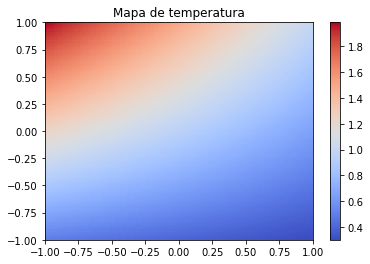

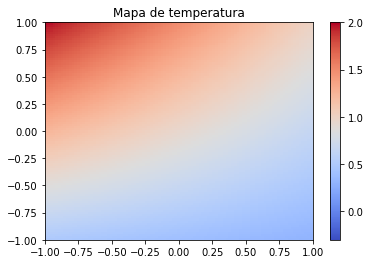

In [842]:
x, y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

z = T((x,y), coef)

l_x=x.min()
r_x=x.max()
l_y=y.min()
r_y=y.max()
l_z,r_z  = -np.abs(z).min(), np.abs(z).max()



figure, axes = plt.subplots()

c = axes.pcolormesh(x, y, z, cmap='coolwarm')
#c = axes.pcolormesh(x, y, z, cmap='coolwarm', vmin=l_z, vmax=r_z)
axes.set_title('Mapa de temperatura')
#axes.axis([l_x, r_x, l_y, r_y])
figure.colorbar(c)





figure1, axes1 = plt.subplots()

#c = axes.pcolormesh(x, y, z, cmap='coolwarm')
c = axes1.pcolormesh(x, y, z, cmap='coolwarm', vmin=l_z, vmax=r_z)
axes1.set_title('Mapa de temperatura')
axes1.axis([l_x, r_x, l_y, r_y])
figure1.colorbar(c)

<font size = 6> Se realiza el gráfico en 3D

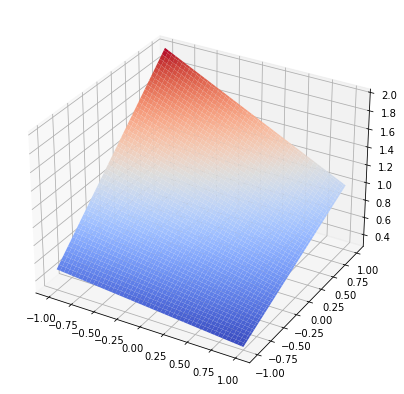

In [843]:
x, y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
f = T((x,y),coef)

#plt.subplots(1,1)


fig, ax = plt.subplots(figsize=(7,7),subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, f, cmap='coolwarm')

<font size = 6> Se estima la temperatura en el punto problemático $T(0,0.5)$

In [844]:
sol = T2(0,0.5,coef)
print('La temperatura hallada es',sol)

La temperatura hallada es 1.225


_

_

<font size = 6> Se inicia el proceso de minimización mediante la función de rotación

In [851]:
def rotation(v): #recibe el vector en una lista/array de dos entradas
    x,y = v
    a = np.cos(x) - np.sin(y)
    b = np.sin(x) + np.cos(y)
    return [a,b]

def rotation2(x,y): #recibe las componentes individualmente
    a = np.cos(x) - np.sin(y)
    b = np.sin(x) + np.cos(y)
    return [a,b]

In [852]:
position = np.zeros((4,2))
posi = [[1,1],[-1,1],[-1,-1],[1,-1]]

for i in range(0,len(posi)):
    position[i]=posi[i]

position

array([[ 1.,  1.],
       [-1.,  1.],
       [-1., -1.],
       [ 1., -1.]])

In [853]:
c = np.array([1,2,0.5,0.3]) #valores a utilizar
N = np.zeros((4,4)) #matriz de coeficientes
for i in range(0,len(N)):
    d = rotation(position[i])
    x,y = d
    #print(c)
    N[i]=coeficientes(x,y,p)
N,c #Matriz y valores brindados

(array([[ 1.        ,  1.38177329, -0.30116868, -0.41614684],
        [ 1.        , -0.30116868, -0.30116868,  0.09070257],
        [ 1.        , -0.30116868,  1.38177329, -0.41614684],
        [ 1.        ,  1.38177329,  1.38177329,  1.90929743]]),
 array([1. , 2. , 0.5, 0.3]))

In [854]:
coef_ = Sol_Minv(N,c)
coef_ #coeficientes

coef = np.zeros((2,2))
for i in range(0,len(coef)):
    fila = [coef_[2*i],coef_[2*i +1]]
    coef[i]=fila
coef_

array([ 1.57823531, -0.50913048, -0.80622925,  0.28245659])

In [855]:
coef

array([[ 1.57823531, -0.50913048],
       [-0.80622925,  0.28245659]])

<font size = 6> Se calcula el valor minimizado de la temperatura sobre el punto en que se dañó el sensor

In [860]:
pos = rotation2(0,0.5)
x,y = pos
T2(x,y,coef)

0.840768385799748

<font size = 5>En progreso/corrección